Franco Hurtado Aguilar - 20200882

# Reporte

El tema que interesa a la autora de este artículo es el rol de las instituciones históricas en explicar el subdesarrollo. Lo que se realiza en el artículo es el uso de variación en la asignación de alguna institución histórica en el Perú, lo que se quiere con esto es determinar identificar a la tenencia de la tierra y los bienes públicos como canales cuyos efectos han persistido hasta la actualidad. En particular, la autora se centrará en el rol y los impactos a largo plazo que ha tenido la mita, que era una manera de trabajo forzado en las minas durante más de 200 años en los periodos del incanato y virreinato. Las hipótesis de este trabajo estiman que la mita ha disminuido el consumo doméstico y ha generado un retraso en el crecimiento infantil. 

Para realizar el análisis acerca de esta institución histórica se utiliza el enfoque de la regresión discontinua, debido a que dentro de la zona donde se realizaba la mita, se presentaban ciertos límites en los que los habitantes no debían asistir a esta actividad, mientas que en otras regiones sí. Considero que las fortalezas de esta investigación derivan del trabajo previo que ha realizado la autora, al revisar extensa bibliografía anterior respecto a este tema, lo que le ha permitido identificar factores que no habían sido estudiados y aún así plantear hipótesis adecuadas para explicar el rol de la mita a través de un modelo adecuado. Considero que el trabajo realizado resulta bastante completo y ofrece conclusiones satisfactorias, por lo que resulta difícil determinar alguna debilidad clara, ya que toma en cuenta todos los factores posibles, a nivel social, económico y geográfico, además de que explica claramente los conceptos que usa y los métodos, resaltando el motivo de sus elecciones.

Además, se resalta la manera en la que esta investigación aporta sobre el tema escogido. Se señala que a pesar de que se ha comprobado en varios artículos que las instituciones históricas tienen un efecto en la prosperidad económica a largo plazo, no se han enfocado en explicar canales de persistencia. En especial, se ha realizado poco esfuerzo en distinguir estos canales, como lo pueden ser los bienes públicos, barreras de entrada, desigualdad, etc. En vista de esta carencia, la autora determina claramente sus canales de persistencia, los cuales serían en este caso la tenencia de la tierra y los bienes públicos. Además, su trabajo aporta en el estudio acerca de los efectos históricos de la desigualdad en el contexto latinoamericano, ya que los estudios acerca de este tema en América solo se han concentrado en Norteamérica, y sus conclusiones no aplican para el contexto histórico de nuestra región.

Un paso que podría seguir a esta investigación sería ahondar en los efectos de factores históricos a nivel de la región, ya que se muestra una carencia en este campo. Por ejemplo, solucionar la cuestión acerca de los efectos de la desigualdad inicial en la tenencia de tierras sobre el crecimiento económico, ya que esto no se logró determinar a partir del análisis realizado acerca de la mita. 


# Código

In [2]:
from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import ssl

## Instrumental Variables

- Explique en qué consiste el supuesto de "Relevance"

Este supuesto implica que la covarianza entre un elemento Z y X, siendo que Z puede explicar X efectivamente, debe ser grande, de lo contrario, se entendería que Z solo explica a X de manera débil.


- Explique en qué consiste el supuesto de "Validity"

En el caso que Z puede explicar a X, se entiende que Z puede explicar a Y a través de X. Sin embargo, si Z puede explicar a Y a través de otras variables, se presenta este supuesto de validez, ya que se sobreponen los efectos de Z sobre Y mediante diferentes variables. 

## Ploteo de Histogramas

In [4]:
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

data = read_data("card.dta")
data.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


### educ

In [5]:
data_1=data

#Seleccionamos las columnas a ultilizar

data_2 = data_1[['educ','nearc4']]
data_2

,educ,nearc4
0,7.0,0.0
1,12.0,0.0
2,12.0,0.0
3,11.0,1.0
4,12.0,1.0
...,...,...
3005,12.0,1.0
3006,13.0,1.0
3007,12.0,1.0
3008,12.0,1.0


In [6]:
data_3 = (data_2
 .assign(nearc4_school = np.select(
     [data_2["nearc4"].astype(bool), data_2["educ"].astype(bool)],
     ["school", "N_school"]
 ))) 
data_3

,educ,nearc4,nearc4_school
0,7.0,0.0,N_school
1,12.0,0.0,N_school
2,12.0,0.0,N_school
3,11.0,1.0,school
4,12.0,1.0,school
...,...,...,...
3005,12.0,1.0,school
3006,13.0,1.0,school
3007,12.0,1.0,school
3008,12.0,1.0,school


In [7]:
#Separamos solo las columnas a utilizar
data_4 = data_3[['educ','nearc4_school']]
data_4

,educ,nearc4_school
0,7.0,N_school
1,12.0,N_school
2,12.0,N_school
3,11.0,school
4,12.0,school
...,...,...
3005,12.0,school
3006,13.0,school
3007,12.0,school
3008,12.0,school


In [8]:
Separar = ["N_school"]
data_5 = data_4[data_4['nearc4_school'].isin(Separar)]
data_5

,educ,nearc4_school
0,7.0,N_school
1,12.0,N_school
2,12.0,N_school
295,12.0,N_school
296,12.0,N_school
...,...,...
2992,12.0,N_school
2993,12.0,N_school
2994,14.0,N_school
2995,10.0,N_school


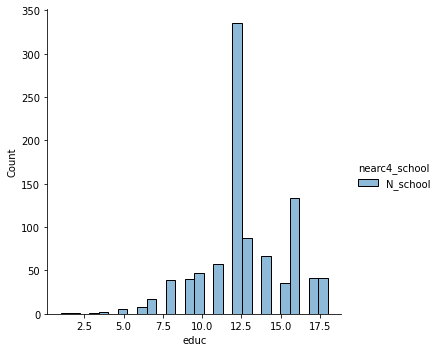

In [9]:
#Histograma sobre ausencia de universidades
sns.displot(data_5, x="educ", hue= "nearc4_school")

In [10]:
Separar_1 = ["school"]
data_6 = data_4[data_4['nearc4_school'].isin(Separar_1)]
data_6

,educ,nearc4_school
3,11.0,school
4,12.0,school
5,12.0,school
6,18.0,school
7,14.0,school
...,...,...
3005,12.0,school
3006,13.0,school
3007,12.0,school
3008,12.0,school


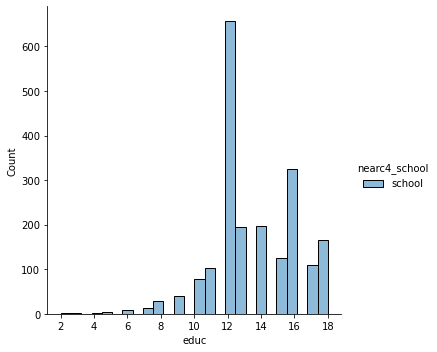

In [12]:
#Histograma sobre presencia de colegios
sns.displot(data_6, x="educ", hue= "nearc4_school")

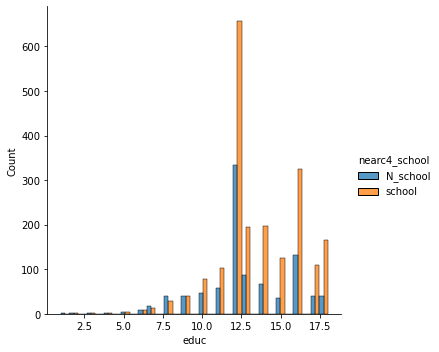

In [13]:
#Histograma conjunto 
sns.displot(data_4, x="educ", hue="nearc4_school", multiple="dodge")

Interpretación:

Se observa en los histogramas que la presencia de universidades influye en los años de educación solo a partir del rango de los 10 años. En este punto se aprecia una gran diferencia entre la cantidad de personas que superan los 10 años de educación, mientras que antes de este trecho no hay una diferencia mayor. 

### Iwage

In [18]:
data1 = data
data2 = data1[['lwage','nearc4']]
data2

,lwage,nearc4
0,6.306275,0.0
1,6.175867,0.0
2,6.580639,0.0
3,5.521461,1.0
4,6.591674,1.0
...,...,...
3005,5.814130,1.0
3006,6.175867,1.0
3007,6.214608,1.0
3008,6.569481,1.0


In [19]:
data3 = (data2
 .assign(nearc4_lwge = np.select(
     [data2["nearc4"].astype(bool),  data2["lwage"].astype(bool)],
     ["school", "N_school"]
 ))) 
data3

,lwage,nearc4,nearc4_lwge
0,6.306275,0.0,N_school
1,6.175867,0.0,N_school
2,6.580639,0.0,N_school
3,5.521461,1.0,school
4,6.591674,1.0,school
...,...,...,...
3005,5.814130,1.0,school
3006,6.175867,1.0,school
3007,6.214608,1.0,school
3008,6.569481,1.0,school


In [20]:
data4 = data3[['lwage','nearc4_lwge']]
data4

,lwage,nearc4_lwge
0,6.306275,N_school
1,6.175867,N_school
2,6.580639,N_school
3,5.521461,school
4,6.591674,school
...,...,...
3005,5.814130,school
3006,6.175867,school
3007,6.214608,school
3008,6.569481,school


In [21]:
Separar_2 = ["N_school"]
data6 = data4[data4['nearc4_lwge'].isin(Separar_2)]
data6

,lwage,nearc4_lwge
0,6.306275,N_school
1,6.175867,N_school
2,6.580639,N_school
295,5.899898,N_school
296,6.700731,N_school
...,...,...
2992,6.109248,N_school
2993,5.572154,N_school
2994,6.068426,N_school
2995,5.257495,N_school


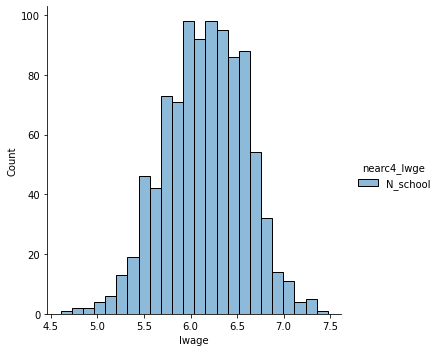

In [22]:
#Histograma sobre la ausencia de universidades
sns.displot(data6, x="lwage", hue= "nearc4_lwge")

In [23]:
Separar_3 = ["school"]
data7 = data4[data4['nearc4_lwge'].isin(Separar_3)]
data7

,lwage,nearc4_lwge
3,5.521461,school
4,6.591674,school
5,6.214608,school
6,6.336826,school
7,6.410175,school
...,...,...
3005,5.814130,school
3006,6.175867,school
3007,6.214608,school
3008,6.569481,school


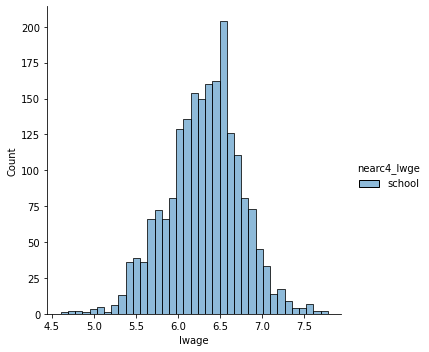

In [24]:
sns.displot(data7, x="lwage", hue= "nearc4_lwge")

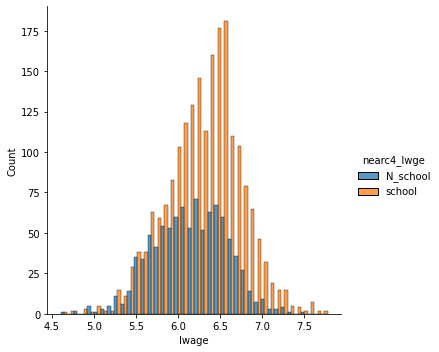

In [25]:
#Histograma conjunto
sns.displot(data4, x="lwage", hue="nearc4_lwge", multiple="dodge")

Interpretación:

Se observa una mayoría de personas que tienen un salario alto dentro del grupo en presencia de universidades, además de que estos son los que son capaces de llegar a los niveles más altos de salario. En cambio, aquellas personas en ausencia de universidades tienen en promedio salarios más bajos, aunque cabe resaltar que en los niveles más bajos de salario existe menos diferencia entre ambos grupos de personas. 

## Regresiones

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [26]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = data).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        11:55:02   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretación:
    
Se observa que las variables que tienen un efecto positivo sobre el salario, según la regresión realizada son educ, exper y smsa. Por otro lado, las variables que afectan negativamente al salario son black, south y married. Todas las variables son significativas para explicar el salario considerando que su p-value es inferior al supuesto de 0.05, y el modelo explica el 30% de la variación del salario, según el R².

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 .
La regressión debería tener una forma de este tipo "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]".
Compare los resultados encontrados en la regresión de arriba. Cambió el coeficiente relacionado a educ , por qué?

In [27]:
data['married'] = data['married'].fillna(0)
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc4]", data).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2428
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2413
No. Observations:                3010   F-statistic:                    884.54
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        12:00:17   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.0998     0.8209     4.9942     0.0000      2.4909      5.7088
black         -0.1110     0.0493    -2.2504     0.0244     -0.2076     -0.0143
exper          0.0571     0.0195     2.9262     0.0034      0.0189      0.0953
married       -0.0318     0.0050    -6.3846     0.0000     -0.0415     -0.0220
smsa           0.1448     0.0302     4.8025     0.0000      0.0857      0.2039
south         -0.1128     0.0228    -4.9550     0.0000     -0.1574     -0.0682
educ           0.1279     0.0484     2.6438     0.0082      0.0331      0.2227
==============================================================================

Endogenous: educ
Instruments: nearc4
Robust Covariance (Heteroskedastic)
Debiased: False
"""

In [28]:
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", data).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        12:08:25   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Interpretación:

Se observan algunas diferencias entre ambos modelos. En primer lugar, cuando se utiliza nearc2 como instrumento, la influencia de la variables black se torna positiva, y aumenta la influencia positiva de variables como smsa, exper y más significativamente educ, la cuya influencia se triplica. Sin embargo, el p-value de la mayoría de variables se torna mayor de 0.05 cuando se utiliza nearc2 como instrumento, por lo que estas variables no explican la variable de salario de manera significativa en este modelo. 